In [1]:
import pandas as pd
from os import listdir
from matplotlib import image as mpimg
import cv2

import pandas as pd
import matplotlib as mat
import numpy as np
import os
import json
import cv2
import random
import sklearn
import pybboxes as pbx
import pydot
import json
import tqdm
import shapely
import yaml
import shutil
from tqdm.notebook import tqdm
from ultralytics import YOLO
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from tqdm import tqdm

In [2]:
# Directory Initialization

#Training
training_image = "F:/UNI/Proposal Skripsi/deepfashion2_dataset/train/image"
training_annos = "F:/UNI/Proposal Skripsi/deepfashion2_dataset/train/annos"

#Validation
val_image = "F:/UNI/Proposal Skripsi/deepfashion2_dataset/validation/image"
val_annos = "F:/UNI/Proposal Skripsi/deepfashion2_dataset/validation/annos"

#Test
test_image = "F:/UNI/Proposal Skripsi/deepfashion2_dataset/test/image"

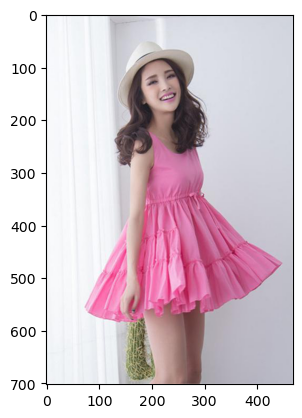

In [3]:
#Test if disk F: can be read
#If not please disconnect then reconnect Disk F:

img_id = "006349"
image = mpimg.imread(f"F:/UNI/Proposal Skripsi/deepfashion2_dataset/train/image/{img_id}.jpg")
plt.imshow(image)
plt.show()

In [4]:
# Destination directories
pos_img_dir = "F:/Skripsi/deepfashion2_dataset_filter/train/pos/img"
pos_anno_dir = "F:/Skripsi/deepfashion2_dataset_filter/train/pos/anno"
neg_img_dir = "F:/Skripsi/deepfashion2_dataset_filter/train/neg/img"
neg_anno_dir = "F:/Skripsi/deepfashion2_dataset_filter/train/neg/anno"

# Create destination directories if they don't exist
os.makedirs(pos_img_dir, exist_ok=True)
os.makedirs(pos_anno_dir, exist_ok=True)
os.makedirs(neg_img_dir, exist_ok=True)
os.makedirs(neg_anno_dir, exist_ok=True)

In [5]:
#Initialize classes to be filtered out
filter = {'long sleeve top', 'long sleeve outerwear', 'short sleeve outerwear', 'long sleeve outerwear', 'trousers', 'skirt', 'short sleeve dress', 'long sleeve dress'}

In [7]:
# Get list of annotation files
anno_files = os.listdir(training_annos)

# Initialize progress bar
with tqdm(total=len(anno_files)) as pbar:
    for anno_file in anno_files:
        with open(os.path.join(training_annos, anno_file), 'r') as f:
            data = json.load(f)

        # Initialize flags and lists
        is_positive = False
        is_negative = True
        categories = []

        # Loop through each item in the data
        for item_key in data.keys():
            if item_key.startswith('item'):
                category = data[item_key]['category_name']
                categories.append(category)

                if category not in filter:
                    is_positive = True

                if category in filter:
                    is_negative = False

        # Copy files based on flags
        img_file = anno_file.replace('.json', '.jpg')
        if is_positive:
            shutil.copy(os.path.join(training_image, img_file), os.path.join(pos_img_dir, img_file))
            shutil.copy(os.path.join(training_annos, anno_file), os.path.join(pos_anno_dir, anno_file))

        if is_negative:
            shutil.copy(os.path.join(training_image, img_file), os.path.join(neg_img_dir, img_file))
            shutil.copy(os.path.join(training_annos, anno_file), os.path.join(neg_anno_dir, anno_file))

        # Update progress bar
        pbar.update(1)

100%|██████████████████████████████████████████████████████████████████████████| 191961/191961 [58:13<00:00, 54.96it/s]


In [8]:
print("Processing complete.")

Processing complete.
